In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Check for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for duplicated rows.

In [5]:
duplicated = df[df.duplicated()]
print("Duplicate rows: ")
duplicated

Duplicate rows: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Detecting outliers

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


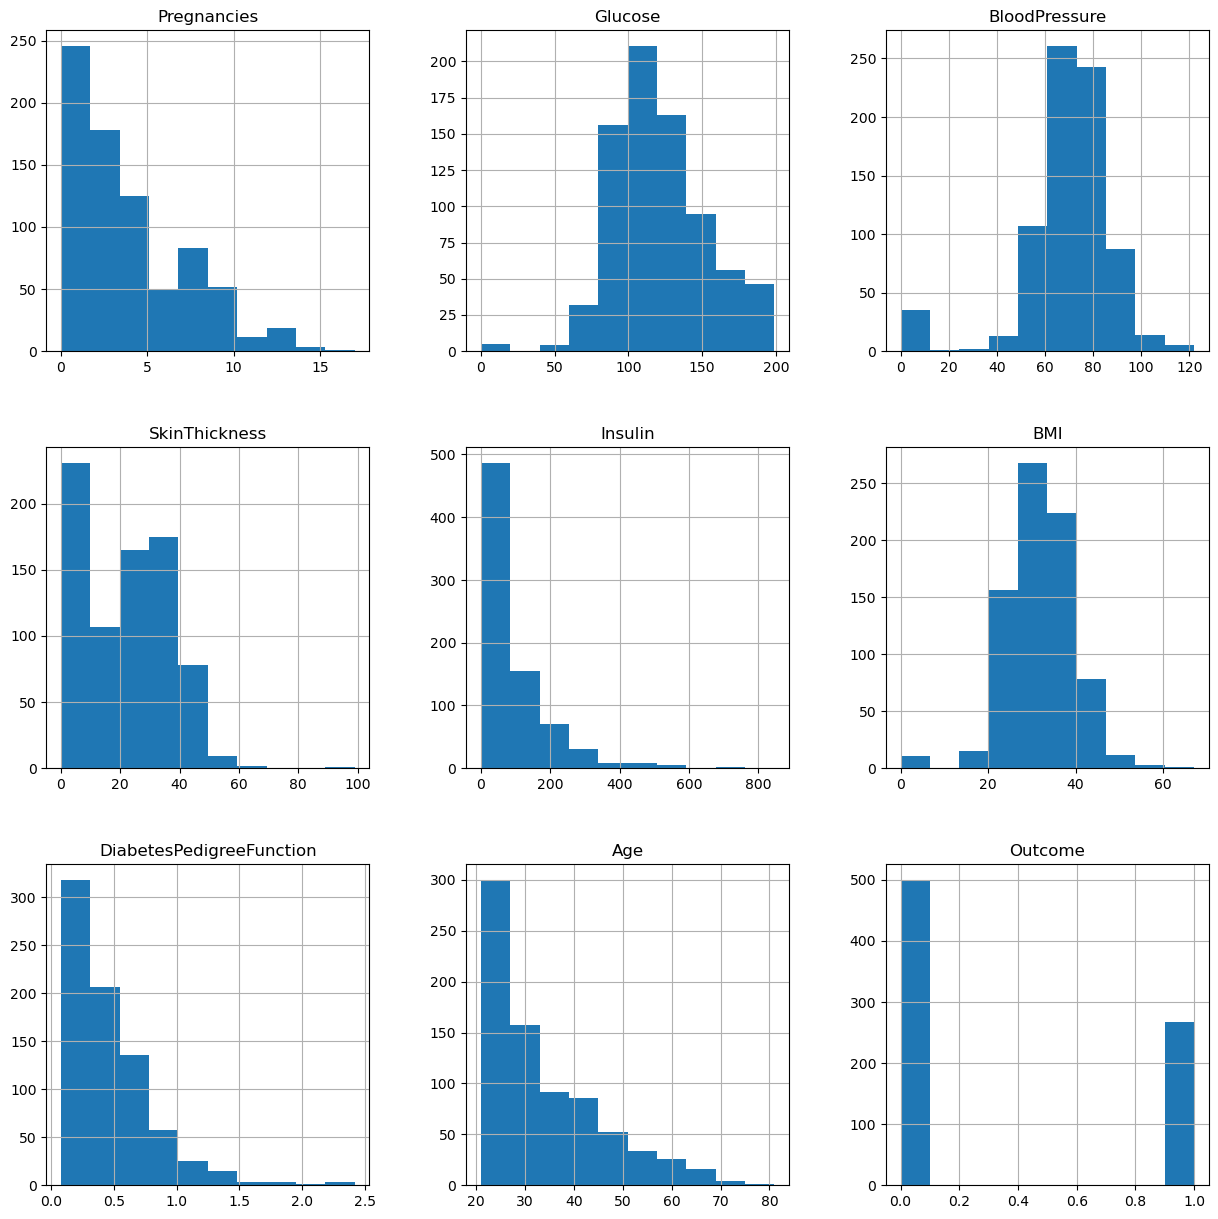

In [7]:
df.hist(figsize=(15,15))
plt.show()

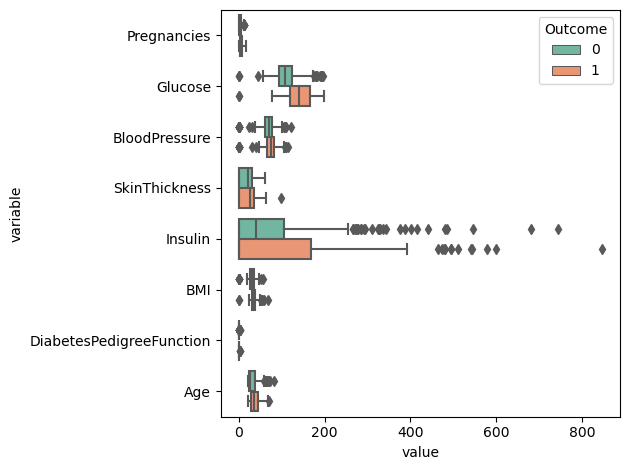

In [8]:
df_long = df.melt(id_vars=['Outcome'])
ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="Outcome")
plt.tight_layout()
plt.show()

In [9]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew, kurtosis, shapiro, kstest

In [10]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

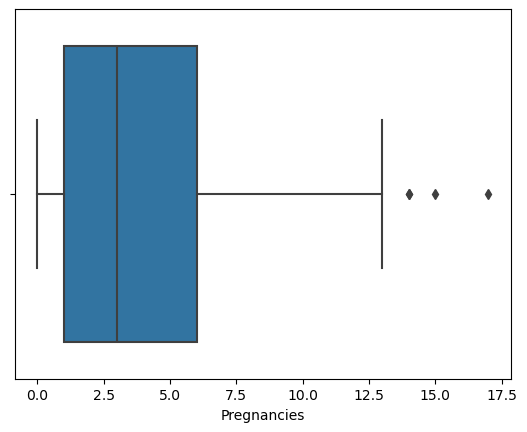

In [11]:
sns.boxplot(x = df['Pregnancies'])
plt.show()

In [12]:
outliers = find_outliers_IQR(df['Pregnancies'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 4
max outlier value: 17
min outlier value: 14


88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

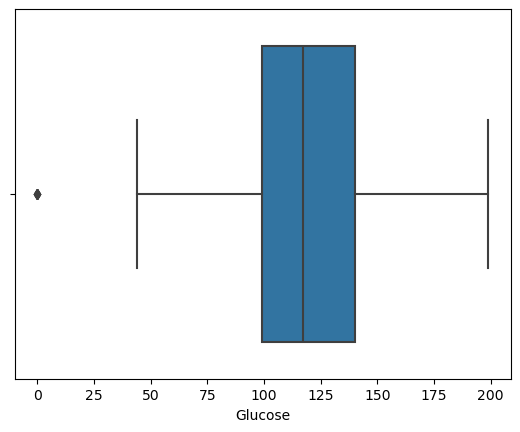

In [13]:
sns.boxplot(x = df['Glucose'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


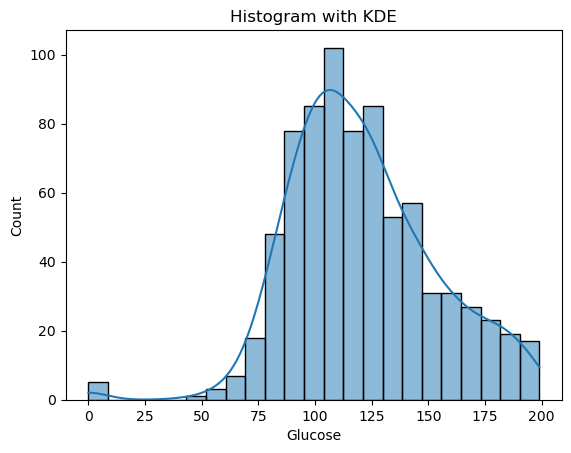

Skewness: 0.17341395519987735
Kurtosis: 0.6288133337300685


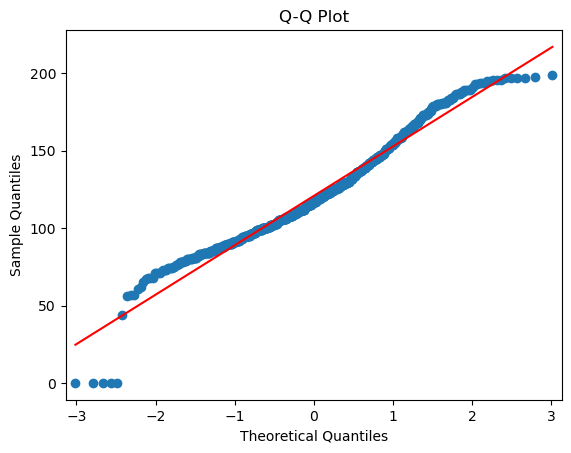

Shapiro-Wilk Test: W=0.9701048731803894, p-value=1.987464880170986e-11
Kolmogorov-Smirnov Test: statistic=0.9934895833333334, p-value=0.0


In [14]:
# Plot histogram
sns.histplot(df['Glucose'], kde=True)
plt.title('Histogram with KDE')
plt.show()

# Calculate skewness and kurtosis
data_skewness = skew(df['Glucose'])
data_kurtosis = kurtosis(df['Glucose'], fisher=True)

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Q-Q plot
qqplot(df['Glucose'], line='s')
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(df['Glucose'])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test against a normal distribution
kstest_result = kstest(df['Glucose'], 'norm')
print(f"Kolmogorov-Smirnov Test: statistic={kstest_result.statistic}, p-value={kstest_result.pvalue}")

In [15]:
outliers = find_outliers_IQR(df['Glucose'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 5
max outlier value: 0
min outlier value: 0


75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

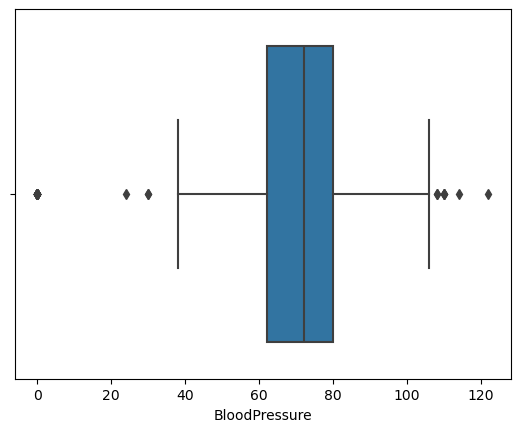

In [16]:
sns.boxplot(x = df['BloodPressure'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


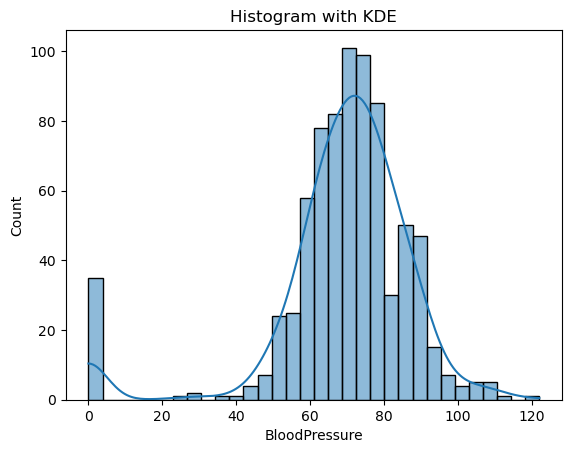

Skewness: -1.8400052311728738
Kurtosis: 5.138690662525438


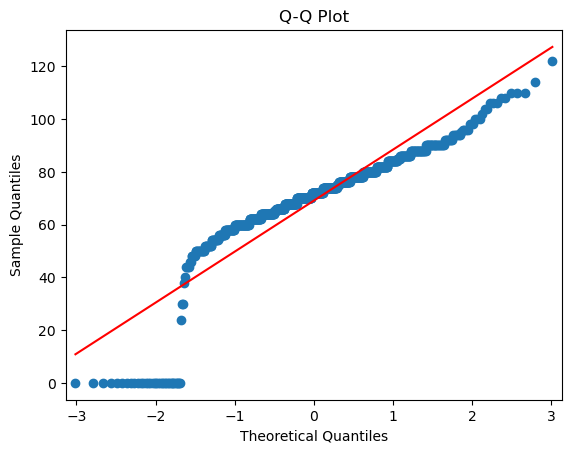

Shapiro-Wilk Test: W=0.8189232349395752, p-value=1.5844768893513403e-28
Kolmogorov-Smirnov Test: statistic=0.9544270833333334, p-value=0.0


In [17]:
# Plot histogram
sns.histplot(df['BloodPressure'], kde=True)
plt.title('Histogram with KDE')
plt.show()

# Calculate skewness and kurtosis
data_skewness = skew(df['BloodPressure'])
data_kurtosis = kurtosis(df['BloodPressure'], fisher=True)

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Q-Q plot
qqplot(df['BloodPressure'], line='s')
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(df['BloodPressure'])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test against a normal distribution
kstest_result = kstest(df['BloodPressure'], 'norm')
print(f"Kolmogorov-Smirnov Test: statistic={kstest_result.statistic}, p-value={kstest_result.pvalue}")

In [18]:
outliers = find_outliers_IQR(df['BloodPressure'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 45
max outlier value: 122
min outlier value: 0


7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64

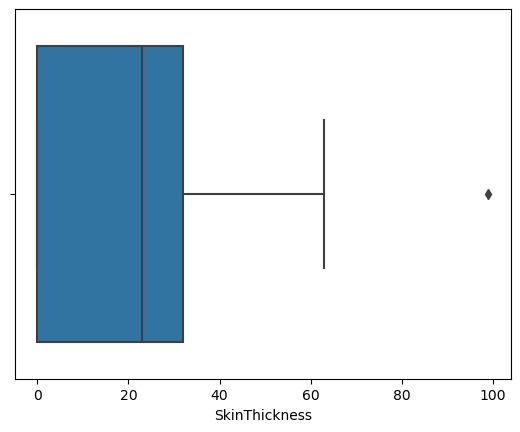

In [19]:
sns.boxplot(x = df['SkinThickness'])
plt.show()

In [20]:
outliers = find_outliers_IQR(df['SkinThickness'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 1
max outlier value: 99
min outlier value: 99


579    99
Name: SkinThickness, dtype: int64

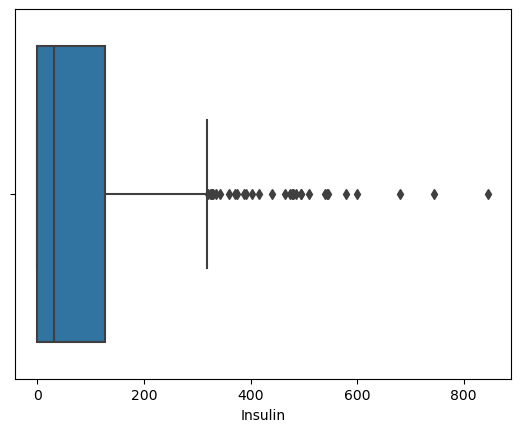

In [21]:
sns.boxplot(x = df['Insulin'])
plt.show()

In [22]:
outliers = find_outliers_IQR(df['Insulin'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 34
max outlier value: 846
min outlier value: 321


8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

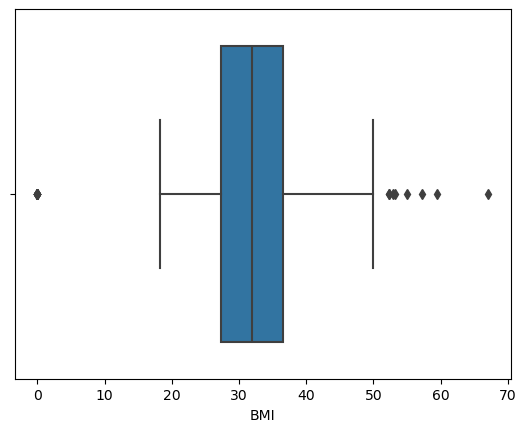

In [23]:
sns.boxplot(x = df['BMI'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


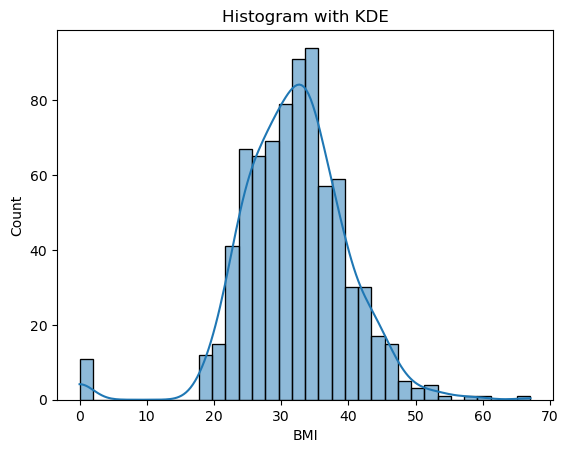

Skewness: -0.42814327880861786
Kurtosis: 3.2612574203612645


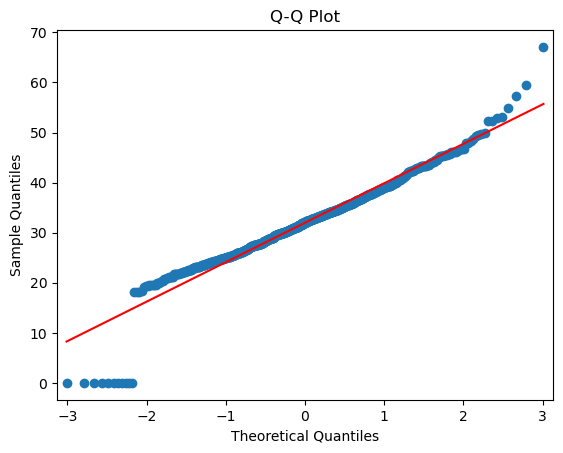

Shapiro-Wilk Test: W=0.9499893188476562, p-value=1.840968936133282e-15
Kolmogorov-Smirnov Test: statistic=0.9856770833333334, p-value=0.0


In [24]:
# Plot histogram
sns.histplot(df['BMI'], kde=True)
plt.title('Histogram with KDE')
plt.show()

# Calculate skewness and kurtosis
data_skewness = skew(df['BMI'])
data_kurtosis = kurtosis(df['BMI'], fisher=True)

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Q-Q plot
qqplot(df['BMI'], line='s')
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(df['BMI'])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test against a normal distribution
kstest_result = kstest(df['BMI'], 'norm')
print(f"Kolmogorov-Smirnov Test: statistic={kstest_result.statistic}, p-value={kstest_result.pvalue}")

In [25]:
outliers = find_outliers_IQR(df['BMI'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 19
max outlier value: 67.1
min outlier value: 0.0


9       0.0
49      0.0
60      0.0
81      0.0
120    53.2
125    55.0
145     0.0
177    67.1
193    52.3
247    52.3
303    52.9
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64

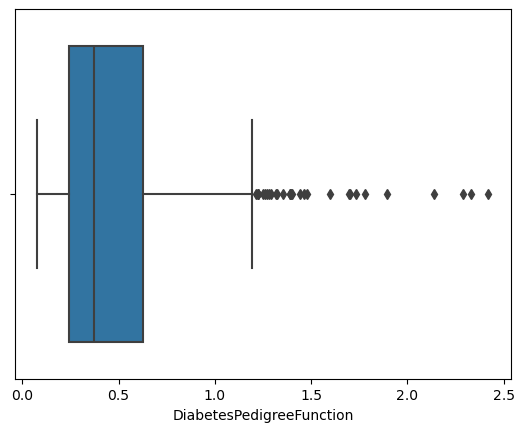

In [26]:
sns.boxplot(x = df['DiabetesPedigreeFunction'])
plt.show()

In [27]:
outliers = find_outliers_IQR(df['DiabetesPedigreeFunction'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 29
max outlier value: 2.42
min outlier value: 1.213


4      2.288
12     1.441
39     1.390
45     1.893
58     1.781
100    1.222
147    1.400
187    1.321
218    1.224
228    2.329
243    1.318
245    1.213
259    1.353
292    1.224
308    1.391
330    1.476
370    2.137
371    1.731
383    1.268
395    1.600
445    2.420
534    1.251
593    1.699
606    1.258
618    1.282
621    1.698
622    1.461
659    1.292
661    1.394
Name: DiabetesPedigreeFunction, dtype: float64

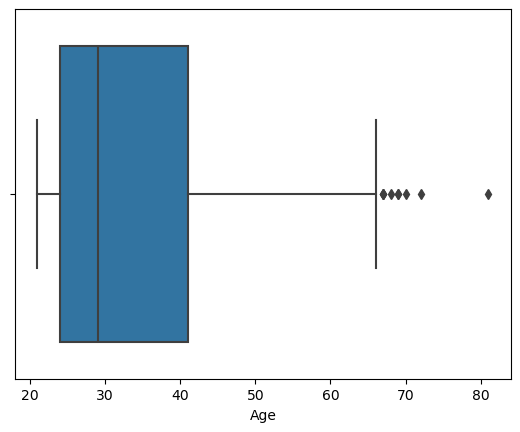

In [28]:
sns.boxplot(x = df['Age'])
plt.show()

In [29]:
outliers = find_outliers_IQR(df['Age'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 9
max outlier value: 81
min outlier value: 67


123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

In [30]:
pd.set_option("display.precision", 3)
correlation = df.corr(method = 'pearson')
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<Axes: >

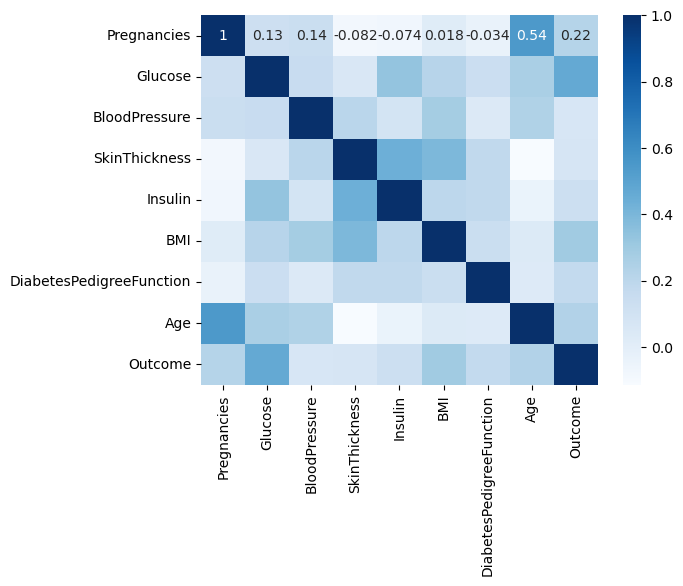

In [31]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [32]:
outliers = find_outliers_IQR(df)
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: \n"+ str(outliers.max()))
print("min outlier value: \n"+ str(outliers.min()))
outliers

number of outliers: 768
max outlier value: 
Pregnancies                  17.00
Glucose                       0.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                        NaN
dtype: float64
min outlier value: 
Pregnancies                  14.000
Glucose                       0.000
BloodPressure                 0.000
SkinThickness                99.000
Insulin                     321.000
BMI                           0.000
DiabetesPedigreeFunction      1.213
Age                          67.000
Outcome                         NaN
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.288,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
